<a href="https://colab.research.google.com/github/irwardhana/DEVSAT_ENV/blob/main/Latihan_pertemuan_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#kmeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')
df.head()
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
gender = df['Gender']
age = df['Age']
income = df['Annual Income (k$)']
spent = df['Spending Score (1-100)']

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


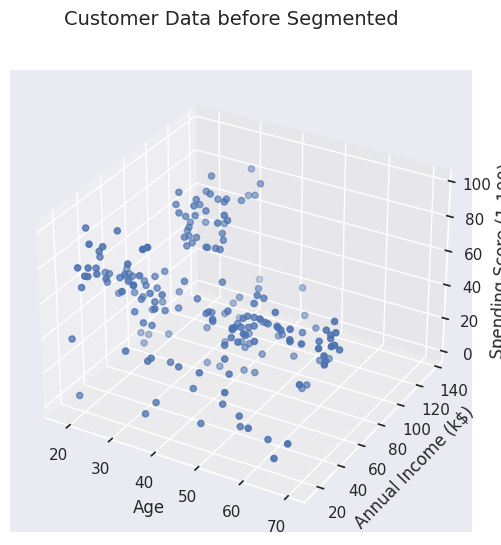

In [30]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Customer Data before Segmented', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# Data for three-dimensional scattered points
ax.scatter(age, income, spent);

In [33]:
# For each k value, we will initialise k-means
# and use the inertia attribute to identify
# the sum of squared distances of samples to the nearest cluster centre

x=df.drop(['Gender','CustomerID'], axis=1)
from sklearn.cluster import KMeans
iner=[]

for i in range(1,30):
    kmeans=KMeans(i)
    kmeans.fit(x)
    iner.append(kmeans.inertia_)

# print(wcss)

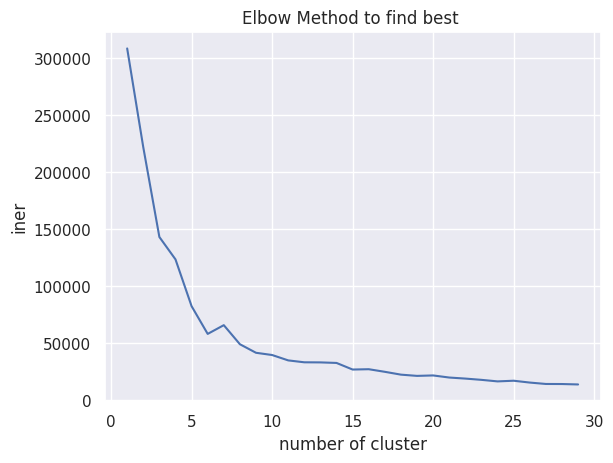

In [28]:
plt.plot(range(1,30),iner)
plt.title('Elbow Method to find best ')
plt.xlabel('number of cluster')
plt.ylabel('iner')
plt.show()

In [34]:
kmeans = KMeans(6)
kmeans.fit(x)
x['c_pred']=kmeans.fit_predict(x)
display(x)

,Age,Annual Income (k$),Spending Score (1-100),c_pred
0,19,15,39,3
1,21,15,81,5
2,20,16,6,3
3,23,16,77,5
4,31,17,40,3
...,...,...,...,...
195,35,120,79,0
196,45,126,28,1
197,32,126,74,0
198,32,137,18,1


In [20]:
np.unique(x['c_pred'])

array([0, 1, 2, 3, 4, 5], dtype=int32)

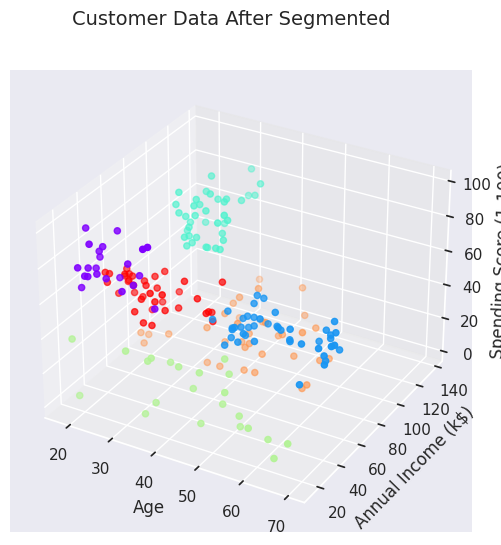

In [21]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Customer Data After Segmented', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# Data for three-dimensional scattered points
ax.scatter(age, income, spent, c=x['c_pred'], cmap='rainbow');

# import plotly

Text(0.5, 0, 'Spending Score (1-100)')

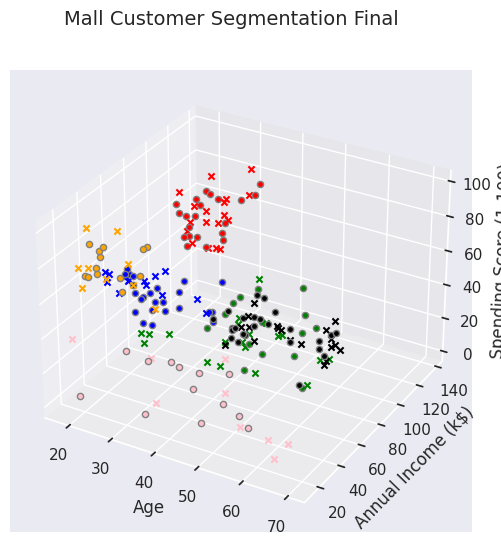

In [35]:
colors = ['red' if i == 0 else 'green' if i == 1 else 'blue' if i == 2 else 'pink' if i == 3 else 'black' if i == 4 else 'orange' for i in list(x['c_pred'])]
markers = ['x' if q == 'Male' else 'o' for q in list(df['Gender'])]



fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Mall Customer Segmentation Final', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(x['Age'])
ys = list(x['Annual Income (k$)'])
zs = list(x['Spending Score (1-100)'])

data_points = [(x_val, y_val, z_val) for x_val, y_val, z_val in zip(xs, ys, zs)]

for data, color, mark in zip(data_points, colors, markers):
    x_val, y_val, z_val = data
    if mark == 'x':
      ax.scatter(x_val, y_val, z_val, c=color, facecolors='gray', marker=mark)
    else:
      ax.scatter(x_val, y_val, z_val, c=color, edgecolors='gray', marker=mark)


ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')